In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start="2012-01-01"
end = "2021-12-31"
df =data.DataReader('AAPL', 'yahoo', start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557467
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898559
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [7]:
clo1=df.reset_index()['Close']
clo1.head()

0    14.686786
1    14.765714
2    14.929643
3    15.085714
4    15.061786
Name: Close, dtype: float64

In [8]:
clo1

0        14.686786
1        14.765714
2        14.929643
3        15.085714
4        15.061786
           ...    
2512    180.330002
2513    179.289993
2514    179.380005
2515    178.199997
2516    177.570007
Name: Close, Length: 2517, dtype: float64

In [9]:
clo1.shape

(2517,)

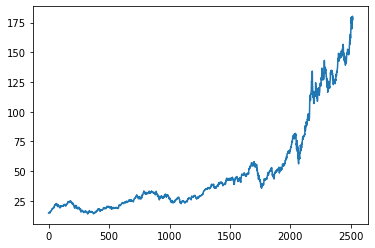

In [10]:
plt.plot(clo1)

In [11]:
rollavg100=clo1.rolling(100).mean()
rollavg100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    153.3444
2513    153.6667
2514    153.9991
2515    154.3202
2516    154.6399
Name: Close, Length: 2517, dtype: float64

In [12]:
rollavg200=clo1.rolling(200).mean()
rollavg200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    142.85570
2513    143.13220
2514    143.40125
2515    143.66845
2516    143.95365
Name: Close, Length: 2517, dtype: float64

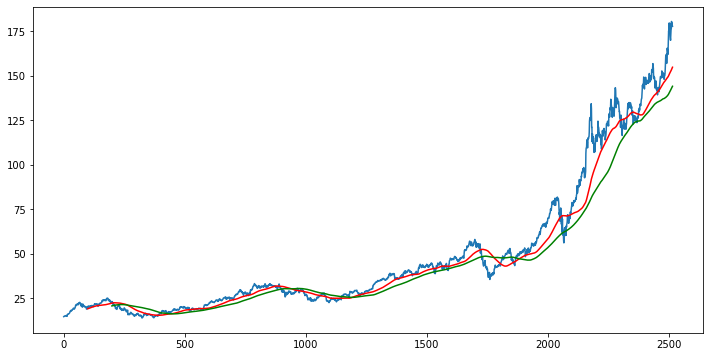

In [13]:
plt.figure(figsize =(12,6))
plt.plot(clo1)
plt.plot(rollavg100,'r')
plt.plot(rollavg200,'g')

# Splitting Data into Training and Testing


In [14]:
data_training=pd.DataFrame(clo1[0:int(len(clo1)*0.7)])
data_testing=pd.DataFrame(clo1[int(len(clo1)*0.7):int(len(clo1))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [15]:
print(data_training.head())
print(data_testing.head())

       Close
0  14.686786
1  14.765714
2  14.929643
3  15.085714
4  15.061786
          Close
1761  35.547501
1762  37.064999
1763  36.982498
1764  37.687500
1765  38.327499


In [16]:
pip install -U scikit-learn

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.56977531],
       [0.57834128],
       [0.57936234]])

In [19]:
data_training_array.shape

(1761, 1)

In [20]:
lis=[]
pre=[]
for i in range(100,data_training_array.shape[0]):
    lis.append(data_training_array[i-100:i])
    pre.append(data_training_array[i, 0])
lis,pre=np.array(lis),np.array(pre)      

In [21]:
lis.shape

(1661, 100, 1)

In [22]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


# ML Model

In [23]:
from tensorflow import keras 

In [24]:
from keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential 

In [25]:
model = Sequential()
model.add(LSTM(units =50,activation='relu',return_sequences = True,input_shape=(lis.shape[1], 1)))
model.add(Dropout(0.2))
          
model.add(LSTM(units =70,activation='relu',return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units =90,activation='relu',return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM(units =120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1)) 

          

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 70)           33880     
                                                                 
 dropout_1 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 90)           57960     
                                                                 
 dropout_2 (Dropout)         (None, 100, 90)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               1

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(lis,pre,epochs=50)

Epoch 1/50
52/52 [==============================] - 17s 234ms/step - loss: 0.0318
Epoch 2/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0079
Epoch 3/50
52/52 [==============================] - 17s 322ms/step - loss: 0.0067
Epoch 4/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0057
Epoch 5/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0051
Epoch 6/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0054
Epoch 7/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0047
Epoch 8/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0047
Epoch 9/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0044
Epoch 10/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0043
Epoch 11/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0049
Epoch 12/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0040
Epoch 13/50
5

In [28]:
model.save('Stock_Market_prediction.h5')

In [29]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [30]:
last_100_days=data_training.tail(100)
finaldata= last_100_days.append(data_testing,ignore_index=True)
finaldata.head()

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001


In [31]:
clo2= scaler.fit_transform(finaldata)
clo2

array([[0.1151555 ],
       [0.1128244 ],
       [0.11513821],
       [0.11665774],
       [0.11750385],
       [0.12282217],
       [0.13017802],
       [0.12651737],
       [0.12579212],
       [0.1258094 ],
       [0.12656917],
       [0.12772607],
       [0.13079965],
       [0.13383868],
       [0.13950234],
       [0.14304214],
       [0.14753165],
       [0.14879215],
       [0.14621932],
       [0.13970957],
       [0.13660145],
       [0.13147307],
       [0.14100462],
       [0.13620431],
       [0.14542503],
       [0.14098733],
       [0.13069605],
       [0.13131767],
       [0.13154213],
       [0.1344085 ],
       [0.13031616],
       [0.13572081],
       [0.13813824],
       [0.13508192],
       [0.142904  ],
       [0.14426813],
       [0.14689274],
       [0.15038074],
       [0.15519832],
       [0.14815327],
       [0.14176435],
       [0.14086647],
       [0.14621932],
       [0.12807141],
       [0.12477336],
       [0.1380001 ],
       [0.12979814],
       [0.138

In [32]:
clo2.shape

(856, 1)

In [33]:
lis2=[]
pre2=[]
for i in range(100,clo2.shape[0]):
    lis2.append(clo2[i-100: i])
    pre2.append(clo2[i, 0])
lis2,pre2=np.array(lis2),np.array(pre2)

In [34]:
print(lis2.shape)
print(pre2.shape)

(756, 100, 1)
(756,)


# Making Predictions

In [35]:
pre_prediction=model.predict(lis2)
pre_prediction.shape

24/24 [==============================] - 3s 90ms/step


(756, 1)

In [36]:
pre_prediction

array([[0.11289197],
       [0.11192262],
       [0.11100909],
       [0.11012343],
       [0.10926989],
       [0.10847972],
       [0.10778686],
       [0.1072056 ],
       [0.10672486],
       [0.10634618],
       [0.10608158],
       [0.10594147],
       [0.10593209],
       [0.1060224 ],
       [0.10617778],
       [0.10635853],
       [0.10656565],
       [0.10679433],
       [0.10702568],
       [0.10732181],
       [0.10774696],
       [0.10833716],
       [0.10913509],
       [0.11017406],
       [0.1114493 ],
       [0.11289342],
       [0.11441603],
       [0.1159175 ],
       [0.11732109],
       [0.11856632],
       [0.11961921],
       [0.12046459],
       [0.12111016],
       [0.12158649],
       [0.12192312],
       [0.12216586],
       [0.12236723],
       [0.12256861],
       [0.12280034],
       [0.12306172],
       [0.123356  ],
       [0.12368694],
       [0.12404811],
       [0.12441863],
       [0.12475975],
       [0.1250414 ],
       [0.1252968 ],
       [0.125

In [37]:
scaler.scale_

array([0.00690691])

In [38]:
scale_factor=1/0.00690691
pre_prediction=pre_prediction*scale_factor
pre2=pre2*scale_factor

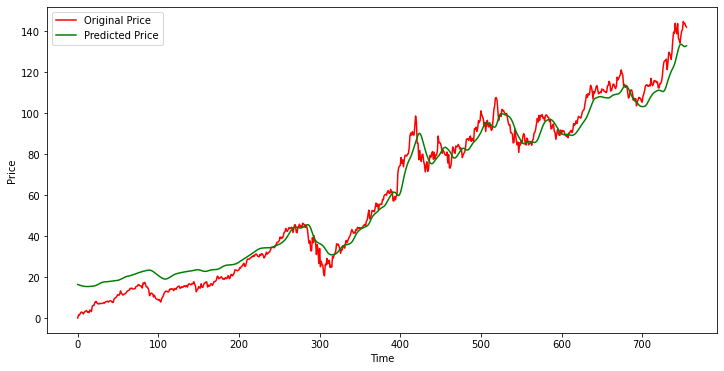

In [39]:
plt.figure(figsize=(12,6))
plt.plot(pre2,'r',label='Original Price')
plt.plot(pre_prediction,'g',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil in c:\users\rshri\anaconda3\lib\site-packages (from streamlit) (2.7.5)

